[View in Colaboratory](https://colab.research.google.com/github/FarmaanElahi/Coursera-ML/blob/master/Ex_1_%20Linear_Regression.ipynb)

## Upload dataset

In [28]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ex1data1.txt to ex1data1.txt
Saving ex1data2.txt to ex1data2 (1).txt
User uploaded file "ex1data1.txt" with length 1359 bytes
User uploaded file "ex1data2.txt" with length 657 bytes


In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Univariate Linear Regression


In [0]:
# Loads data
data=np.loadtxt('ex1data1.txt',delimiter=',')

# Number of data points
m=data.shape[0]

# Number of features
n =data.shape[1]


#Add extra one column of ones to accommodate the θ0 intercept term.
X=np.hstack((np.ones((m,1)),data[:,0].reshape(m,1)))

y=data[:,1].reshape(m,1)

### 2.1 Plotting Data

Text(0,0.5,'Profit in $10,000s')

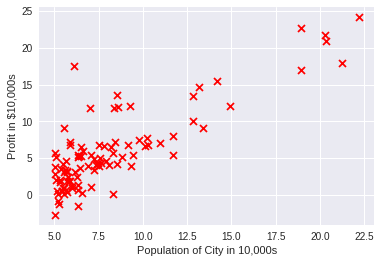

In [188]:
plt.scatter(X[:,1],y,c='r',marker="x")
plt.xlabel('Population of City in 10,000s')
plt.ylabel("Profit in $10,000s")


### 2.2 Gradient Descent

In [0]:
def hypothesis_function(X,theta):
  # Linear regression 
  return X.dot(theta)

In [0]:
def cost_function(X,y,theta):
  
  # Make predicion on all X value for a given theta
  prediction=hypothesis_function(X,theta)
  
  # Calculate the cost
  J= np.mean((prediction-y) ** 2) / 2
  
  # Return th calculated cost
  return J

In [191]:
# Cost of the predcition while theta being all zeros
cost_function(X,y,np.zeros((2,1)))

32.072733877455676

In [0]:
def gradient_descent(X,y,theta,alpha=0.01,iteration=1500):
  
  m = y.shape[0]
  
  J_history=np.empty(iteration)
  for iter in range(iteration):
    # Make a predcition
    prediction = hypothesis_function(X,theta)
    
    # Calculate the error
    error = prediction - y 
    
    # Adjust the theta
    theta = theta -  alpha * (1/m) * X.T.dot(error)
    
    # Calculate the cost
    J_history[iter]=cost_function(X,y,theta)
    
  return (theta,J_history)    

In [193]:

theta,cost=gradient_descent(X,y,np.zeros((n,1)))

print(f"Theta : {theta.ravel()}")

Theta : [-3.63029144  1.16636235]


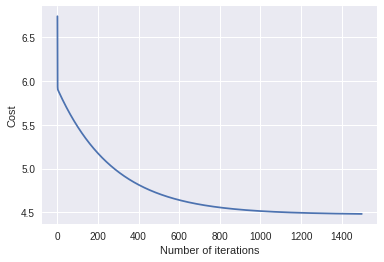

In [194]:
def J_plot(cost):
  plt.plot(cost)
  plt.xlabel("Number of iterations")
  plt.ylabel("Cost")
  
J_plot(cost)

In [195]:
# Predit prefot if the population is 35000 and 70000
x1 = np.array([1 , 3.5])
x2 = np.array([1, 7])

y1 = np.dot(theta.T,x1)
y2= np.dot(theta.T,x2)

print(f"Profit if population is 35000 is {y1 * 10000}")
print(f"Profit if population is 70000 is {y2 * 10000}")

Profit if population is 35000 is [4519.7678677]
Profit if population is 70000 is [45342.45012945]


### 2.4 Visualization

Text(0,0.5,'Profit in $10,000s')

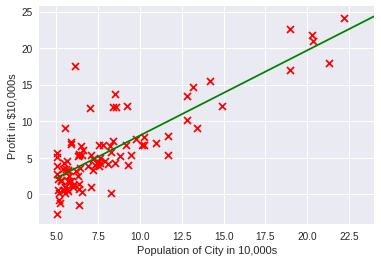

In [196]:
# Figure showing the straight line cutting the datapoints

XX = np.hstack((np.ones((20,1)),np.linspace(5,24,20).reshape(20,1)))
YY = hypothesis_function(XX,theta)

# Plotting values from original dataset
plt.scatter(X[:,1],y,c='r',marker="x")
# Plot the linear relation of the prediction showing linear regresion
plt.plot(XX,YY,c='g')
plt.xlim(4,24)

plt.xlabel('Population of City in 10,000s')
plt.ylabel("Profit in $10,000s")



# 3. Multivariate Linear Regression

In [0]:
# load data for mulutivariate linear regression
data2=np.loadtxt("ex1data2.txt",delimiter=",",dtype='int32')

data2_X = data2[:,:2]
data2_y = data2[:,2:3]

# Number of datapoint
m = data2_X.shape[0]

# Number of features
n = data2_X.shape[1] 

### 3.1 Feature Normalization

In [0]:
# Mean along the column 
meanX = data2_X.mean(axis=0)

#Standard deveiation along the column
stdX = data2_X.std(axis=0)

# Scaling house square footage area
X_norm = (data2_X - meanX)/stdX 

#Adding extra one column for compensatte for the θ0 intercept term. 
X_norm = np.hstack((np.ones((m,1)),X_norm))

#Theta
theta = np.zeros((n,1))

### 3.2 Gradient Descent

Theta [340412.65957447 109447.75525931  -6578.31364383]


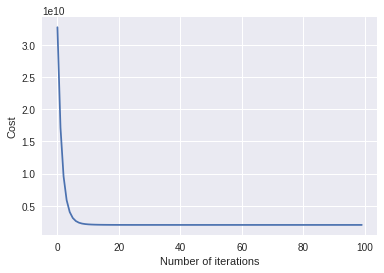

In [236]:
estimated_theta,cost=gradient_descent(X_norm,data2_y,np.zeros((3,1)),alpha = 0.3,iteration=100)
print(f"Theta {estimated_theta.ravel()}")
J_plot(cost)

### 3.3 Estimation

In [237]:
# Estimate the price of house having area 1650 and 3 bedroom
predict_x = np.array([1650,3])
predict_x_norm =(predict_x - meanX)/stdX

predict_x_norm = np.hstack((1,predict_x_norm))
prediction=hypothesis_function(predict_x_norm,estimated_theta)


print(f"Price of house having 1650 square foot area and 3 bedroom will cost somewhere around {prediction[0]}")

Price of house having 1650 square foot area and 3 bedroom will cost somewhere around 293081.47339912935


### 3.4 Normal Equation

In [238]:
from numpy.linalg import  inv

def normalEqn(X,y):
  return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)
  
estimated_theta = normalEqn(X_norm,data2_y)
print(f"Theta {estimated_theta.ravel()}")

Theta [340412.65957447 109447.79646964  -6578.35485416]


In [239]:
print("Prediction using normal equation method")
# Estimate the price of house having area 1650 and 3 bedroom
predict_x = np.array([1650,3])
predict_x_norm =(predict_x - meanX)/stdX

predict_x_norm = np.hstack((1,predict_x_norm))
prediction=hypothesis_function(predict_x_norm,estimated_theta)


print(f"Price of house having 1650 square foot area and 3 bedroom will cost somewhere around {prediction[0]}")

Prediction using normal equation method
Price of house having 1650 square foot area and 3 bedroom will cost somewhere around 293081.4643348961
